# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,5.185267
1,0.00001,6.299248
2,0.00002,4.157313
3,0.00003,5.826755
4,0.00004,6.310192


<AxesSubplot:xlabel='X Data', ylabel='Y'>

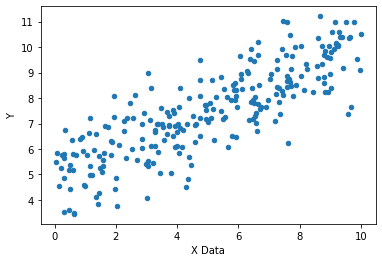

In [7]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [9]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [10]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Graph **

y = m*x + b

** Loss Function **

In [11]:
@tf.function
def loss():
    loss = 0
    
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    x_batch = x_data[rand_ind]
    y_batch = y_true[rand_ind]
    
    for x,y in zip(x_batch, y_batch):
        y_model = m*x + b  #Our predicted value
        loss += tf.reduce_sum(tf.square(y-y_model))
        
    return loss

In [12]:
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [13]:
@tf.function
def do_train():
    batches = 1000
    
    for i in range(batches):
        
        optimizer.minimize(loss, var_list=[m, b])
        
    # Fetch Back Results
    return m, b

In [14]:
model_m, model_b = do_train()

In [15]:
model_m

<tf.Tensor: shape=(), dtype=float32, numpy=0.69901854>

In [16]:
model_b

<tf.Tensor: shape=(), dtype=float32, numpy=3.2775548>

### Results

In [17]:
y_hat = x_data * model_m + model_b

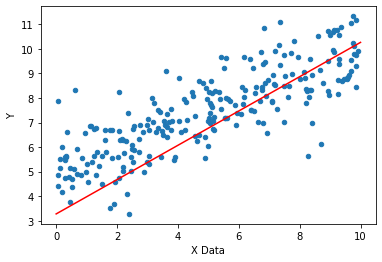

In [18]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

In [19]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [20]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpo5kl5eqz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [23]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


In [24]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [25]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [26]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

In [27]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead

In [28]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-29T15:29:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpo5kl5eqz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/10

In [29]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-29T15:29:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpo5kl5eqz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/10

In [30]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0463636, 'label/mean': 7.505449, 'loss': 1.0463636, 'prediction/mean': 7.412114, 'global_step': 1000}
eval metrics: {'average_loss': 1.0682303, 'label/mean': 7.4751787, 'loss': 1.0682303, 'prediction/mean': 7.37281, 'global_step': 1000}


### Predictions

In [31]:
input_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [32]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpo5kl5eqz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3846774], dtype=float32)},
 {'predictions': array([5.0534387], dtype=float32)},
 {'predictions': array([5.7222004], dtype=float32)},
 {'predictions': array([6.3909616], dtype=float32)},
 {'predictions': array([7.059723], dtype=float32)},
 {'predictions': array([7.728484], dtype=float32)},
 {'predictions': array([8.397245], dtype=float32)},
 {'predictions': array([9.066007], dtype=float32)},
 {'predictions': array([9.734768], dtype=float32)},
 {'predictions': array([10.40353], dtype=float32)}]

In [33]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpo5kl5eqz\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
predictions

[array([4.3846774], dtype=float32),
 array([5.0534387], dtype=float32),
 array([5.7222004], dtype=float32),
 array([6.3909616], dtype=float32),
 array([7.059723], dtype=float32),
 array([7.728484], dtype=float32),
 array([8.397245], dtype=float32),
 array([9.066007], dtype=float32),
 array([9.734768], dtype=float32),
 array([10.40353], dtype=float32)]

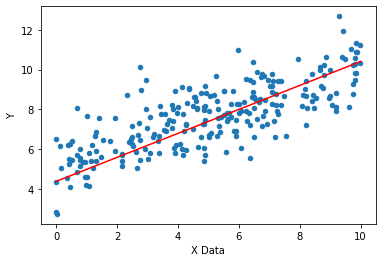

In [35]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')